# Forest Cover Type - Exploration

Hi! Thanks for checking this notebook. We'll we working on the Forest Cover Type dataset, which contains tree observations from four areas of the Roosevelt National Forest in Colorado.

In this notebook an exploratory analysis will be conducted using all of the available data.

In [1]:
import dython.nominal as dm
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')

Let's begin by inspecting the dataset:

In [3]:
data = pd.read_csv('../input/covtype.csv')

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


No missing values, that's great. For a better understanding of the classes we're trying to predict we'll map their category number to the forest cover type name:

In [4]:
forest_map = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'}

data['Cover_Type'] = data['Cover_Type'].map(forest_map)

Now, let's check the proportion of data across the different categories. (I know the code for the donut chart is really convoluted but that is the way the official docs do it)

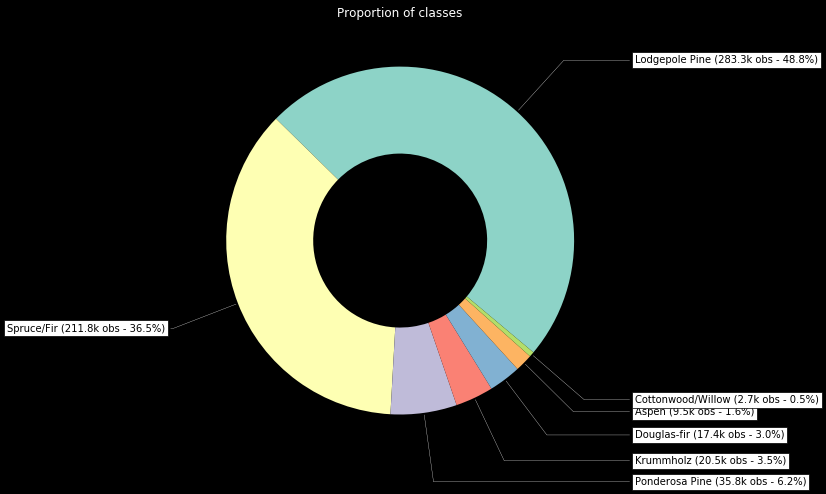

In [5]:
def donut_chart(data):
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

    recipe = list(data['Cover_Type'].value_counts().index)

    info = data['Cover_Type'].value_counts()

    def pcts(val_list):
        pct = []
        for val in val_list:
            pct.append(" ({:.1f}k obs - {:.1f}%)".format(val/1000, 100*val/np.sum(val_list)))
        return pct

    recipe2 = pcts(info)

    wedges, texts = ax.pie(info, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        kw["color"] = 'k'
        ax.annotate(recipe[i]+recipe2[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)

    ax.set_title("Proportion of classes")

    plt.show()
    
donut_chart(data)

The class imbalance is really clear in this dataset. For prediction some synthetic data generation techniques such as SMOTE can be used. However it is not my intention to do that in this notebook, we'll just have to be sure to take into account the imbalance when fitting and evaluating models.

Now let's check the predictors, starting by the categorical ones:

In [8]:
soil_types = [i for i in data.columns if 'Soil' in i]
wilderness_areas = [i for i in data.columns if 'Wilderness' in i]

data_categorical = data.copy(deep=True)
data_categorical = data_categorical.drop(soil_types, axis=1)
data_categorical = data_categorical.drop(wilderness_areas, axis=1)

data_categorical['Soil_Type'] = data[soil_types].idxmax(axis=1)
data_categorical['Wilderness_Area'] = data[wilderness_areas].idxmax(axis=1)

data_categorical['Soil_Type'] = data_categorical['Soil_Type'].str.replace('Soil_Type', '')
data_categorical['Wilderness_Area'] = data_categorical['Wilderness_Area'].str.replace('Wilderness_Area', '')

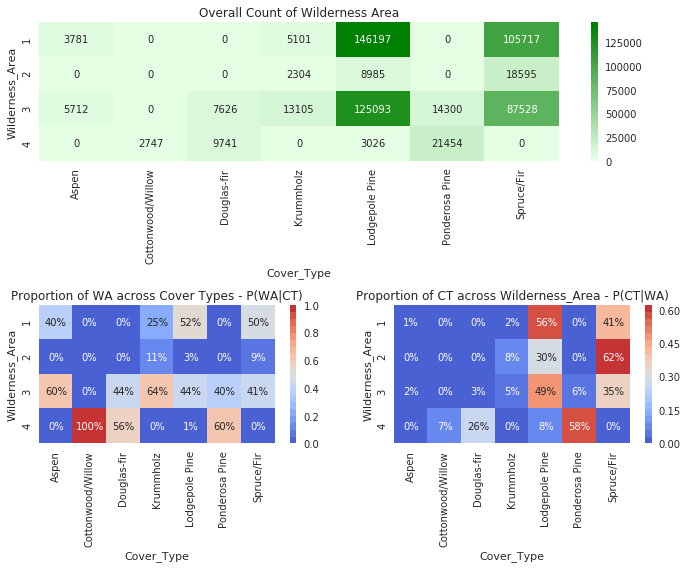

In [9]:
wild_ct = pd.crosstab(data_categorical['Wilderness_Area'], 
                      data_categorical['Cover_Type'])

wild_ct_pct = wild_ct.apply(lambda r: r/r.sum(), axis=0)
wild_ct_pct2 = wild_ct.apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(10,8))

ax1 = plt.subplot2grid((2,2), (0, 0), colspan=2, title='Overall Count of Wilderness Area')
ax2 = plt.subplot2grid((2,2), (1, 0), title='Proportion of WA across Cover Types - P(WA|CT)')
ax3 = plt.subplot2grid((2,2), (1, 1), title='Proportion of CT across Wilderness_Area - P(CT|WA)')

sns.heatmap(wild_ct, cmap=sns.light_palette("green", 40), annot=True, fmt='g', ax=ax1)
sns.heatmap(wild_ct_pct, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax2)
sns.heatmap(wild_ct_pct2, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax3)

plt.tight_layout()
plt.show()

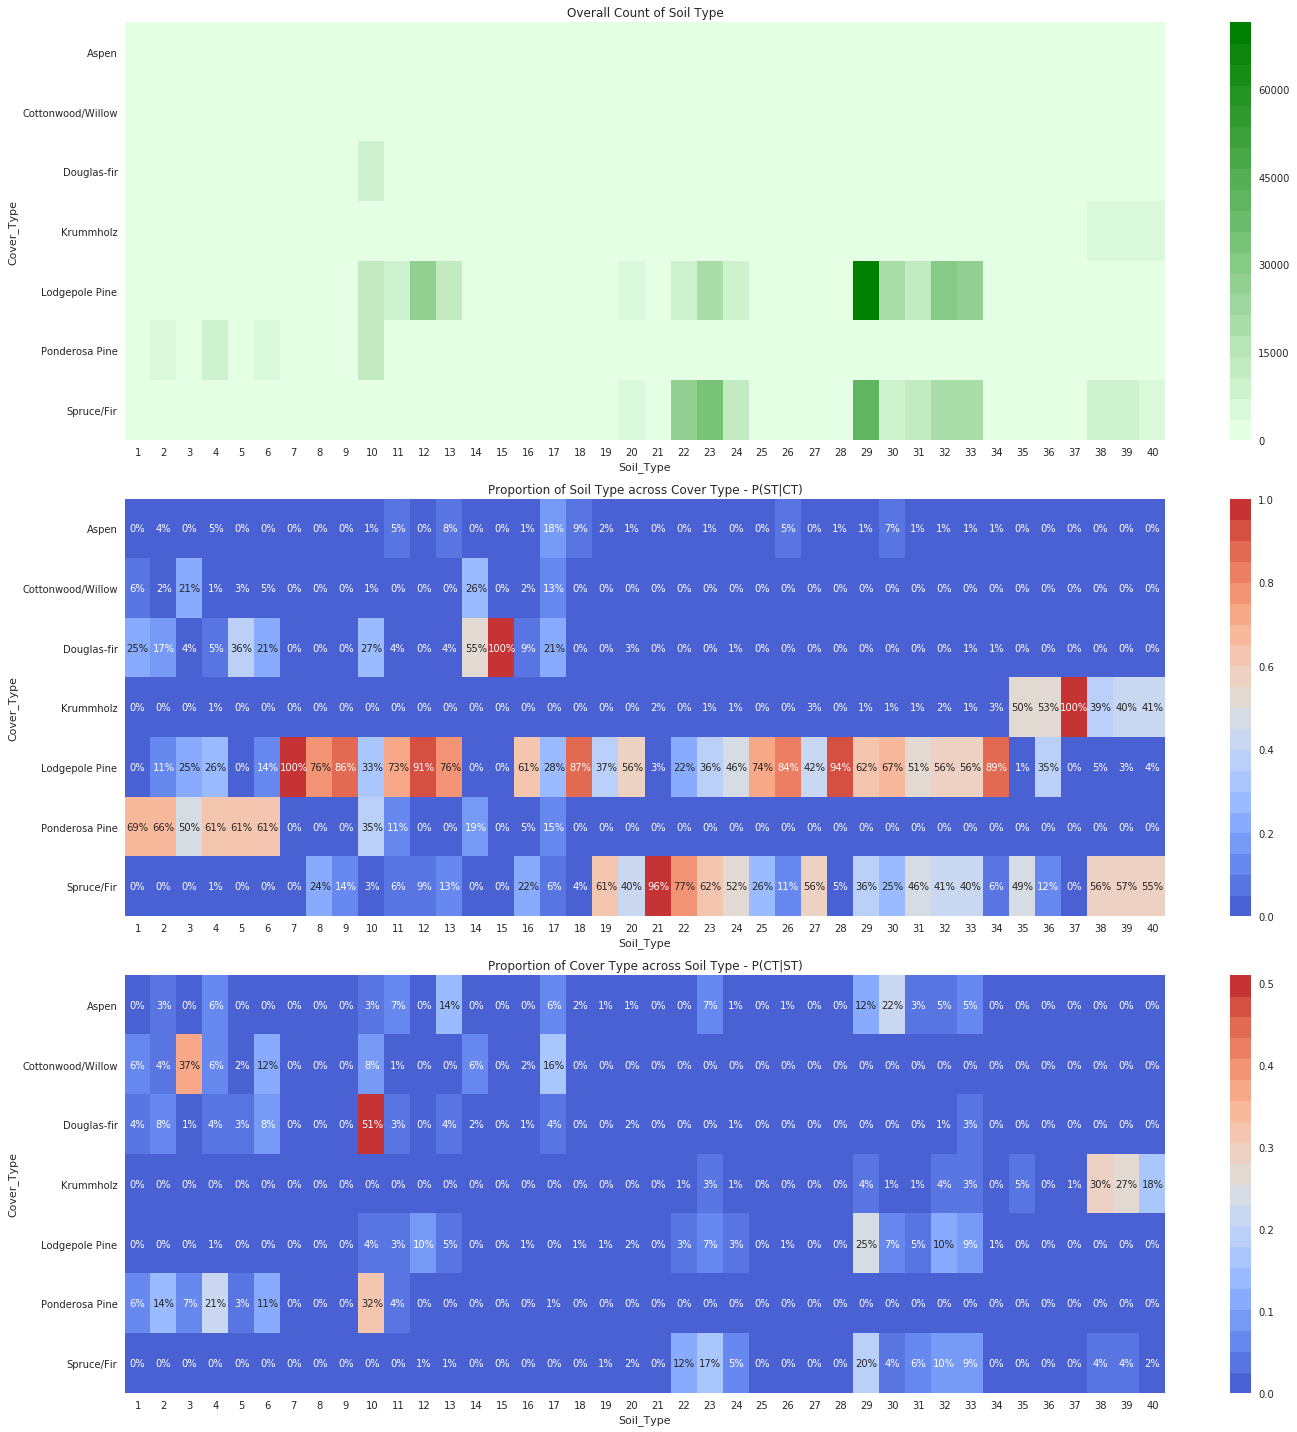

In [10]:
st = [str(i) for i in range(1,41)]

soil_ct = pd.crosstab(data_categorical['Soil_Type'], 
                      data_categorical['Cover_Type'])

soil_ct = soil_ct.T[st]

soil_ct_pct = soil_ct.apply(lambda r: r/r.sum(), axis=0)
soil_ct_pct2 = soil_ct.apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(20,20))

ax1 = plt.subplot2grid((3,1), (0, 0), colspan=2, title='Overall Count of Soil Type')
ax2 = plt.subplot2grid((3,1), (1, 0), title='Proportion of Soil Type across Cover Type - P(ST|CT)')
ax3 = plt.subplot2grid((3,1), (2, 0), title='Proportion of Cover Type across Soil Type - P(CT|ST)')

sns.heatmap(soil_ct, cmap=sns.light_palette("green", 20), annot=False, fmt='g', ax=ax1)
sns.heatmap(soil_ct_pct, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax2)
sns.heatmap(soil_ct_pct2, cmap=sns.color_palette("coolwarm", 20), annot=True, fmt='.0%', ax=ax3)

plt.tight_layout()
plt.show()

Moving onto the numerical features:

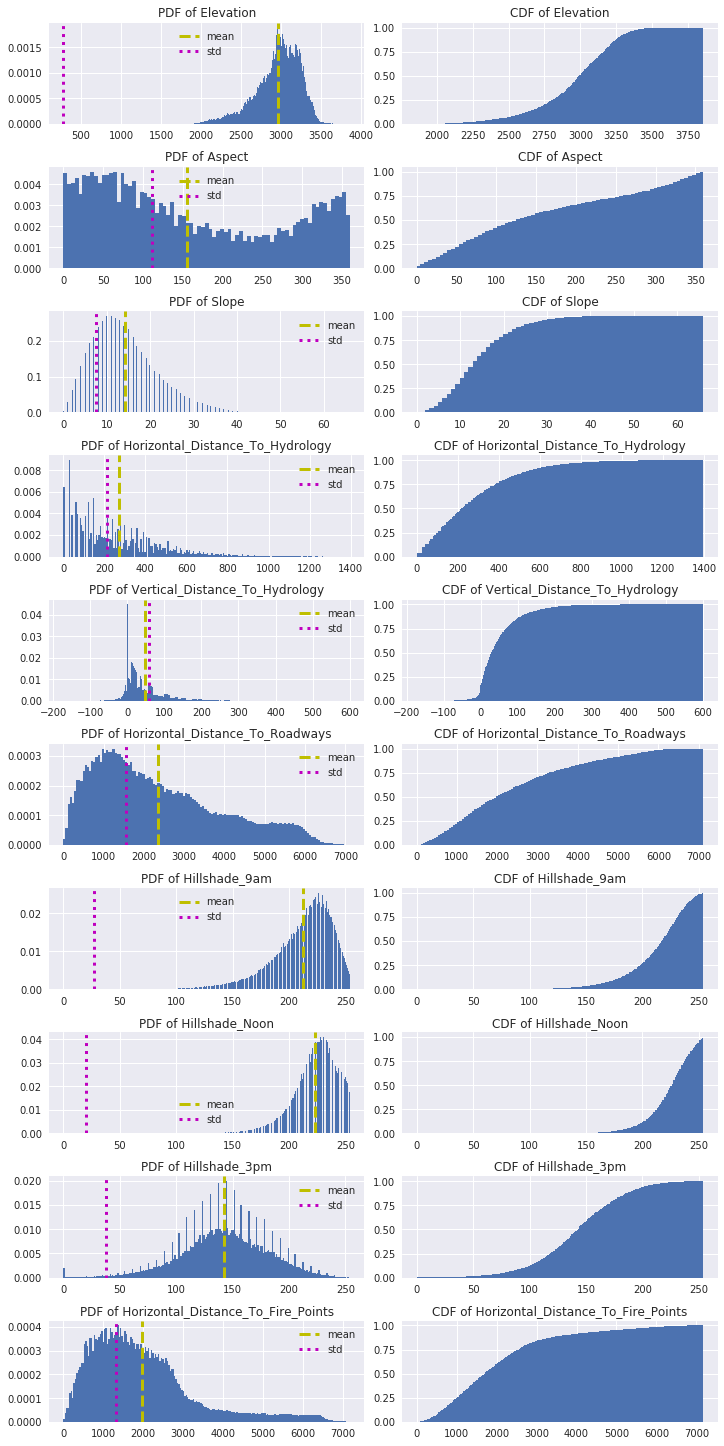

In [11]:
fig, axes = plt.subplots(10, 2, figsize=(10,20))

for i in range(10):
    pred_name = data.columns[i]
    axes[i, 0].hist(data.iloc[:, i], bins="auto", density=True)
    axes[i, 0].set_title(f"PDF of {pred_name}")
    axes[i, 0].axvline(data.iloc[:, i].mean(), color = "y", linestyle="dashed", label="mean", linewidth=3)
    axes[i, 0].axvline(data.iloc[:, i].std(), color = "m", linestyle="dotted", label="std", linewidth=3)
    axes[i, 0].legend(("mean", "std"),loc="best")
    
    axes[i, 1].hist(data.iloc[:, i], bins="auto", density=True, cumulative=True)
    axes[i, 1].set_title(f"CDF of {pred_name}")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

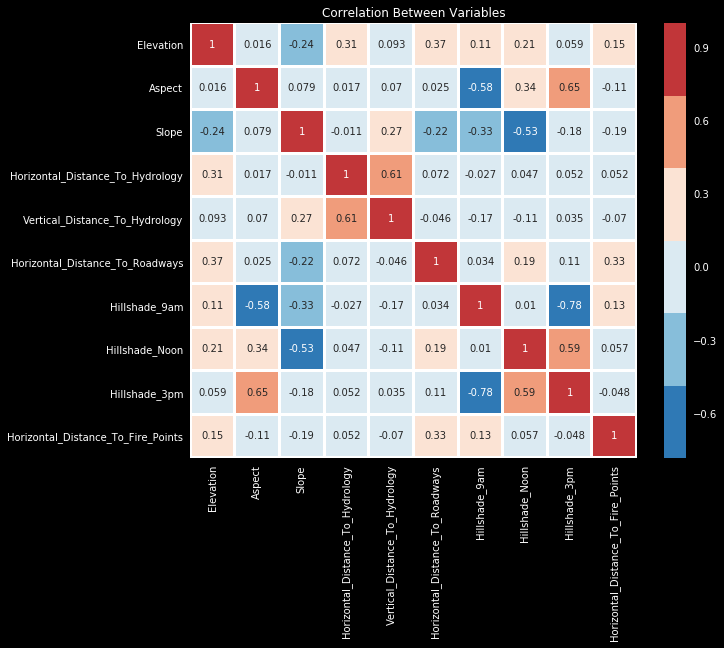

In [4]:
data_cor = data.iloc[:, 0:10]
correlation = data_cor.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("RdBu_r"),
            linewidth=2,edgecolor="k")
plt.title("Correlation Between Variables")
plt.show()

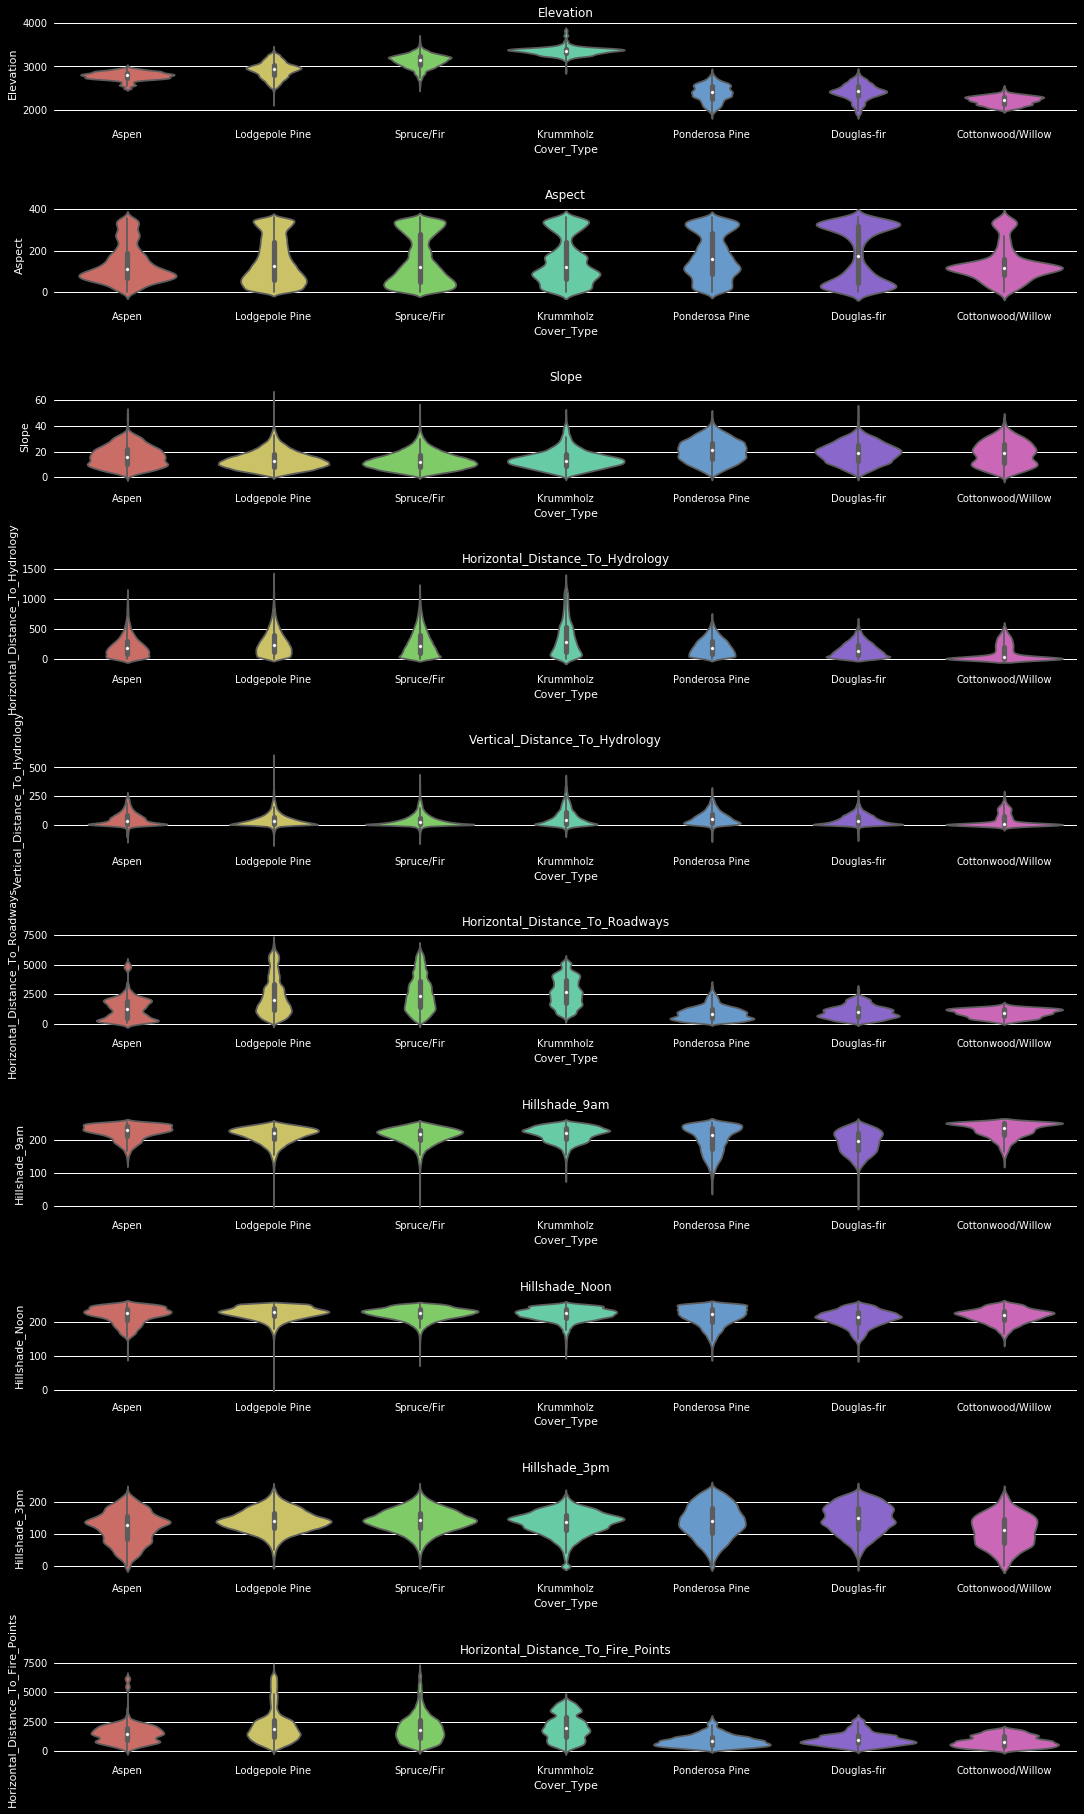

In [11]:
plt.figure(figsize=(15,25))

for i in range(10):
    plt.subplot(10,1,i+1)
    sns.violinplot(x=data['Cover_Type'],y=data.iloc[:, i],
                   palette=sns.color_palette("hls", 7),alpha=.5)
    plt.title(data.columns[i])
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

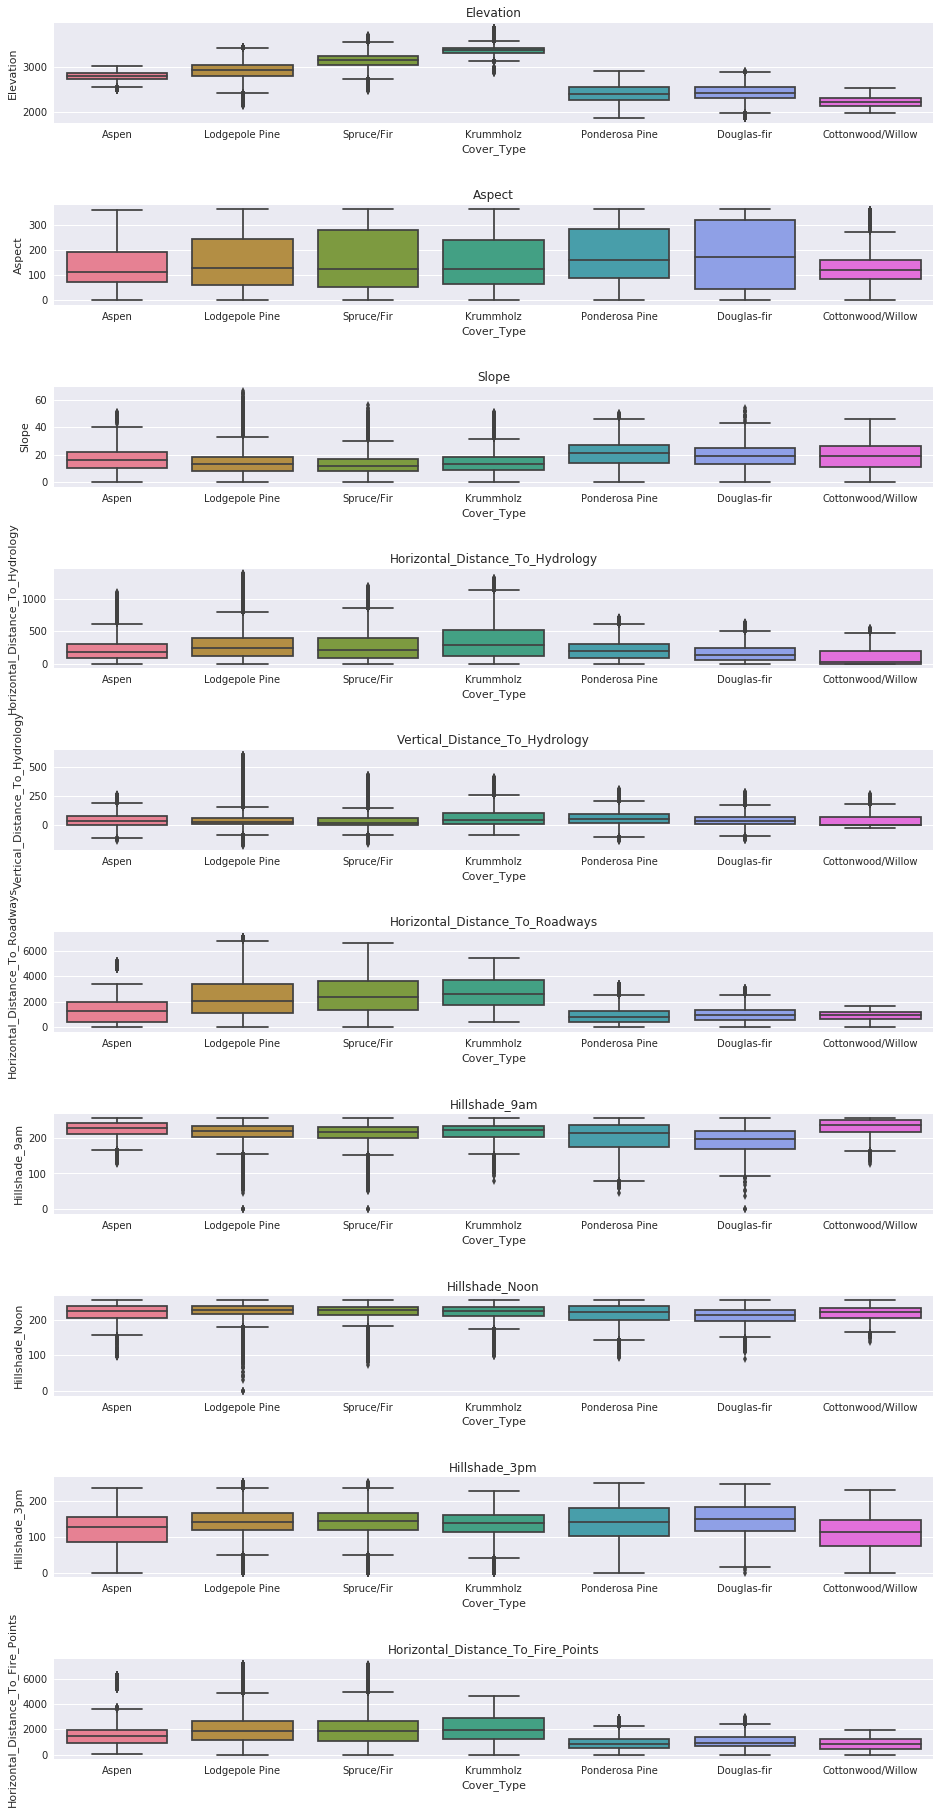

In [14]:
plt.figure(figsize=(13,25))

for i in range(10):
    plt.subplot(10,1,i+1)
    sns.boxplot(data['Cover_Type'],y=data.iloc[:, i], 
                palette=sns.color_palette("husl", 7), color="w")
    plt.title(data.columns[i])
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()



Now let's use PCA to reduce the dimensionality of the problem and check if it is a viable strategy for using when predicting. 

It is important to notice that it is a bad practice to scale the data using the complete dataset, but since this notebook's approach is merely exploratory, it should be alright:

In [6]:
from sklearn.preprocessing import StandardScaler

num_data = data.copy(deep=True)
num_data = data.iloc[:,:10]
num_data = num_data.astype(np.float64)

std_scaler = StandardScaler()
std_scaler.fit(num_data)
num_data = pd.DataFrame(std_scaler.transform(num_data), columns=num_data.columns)

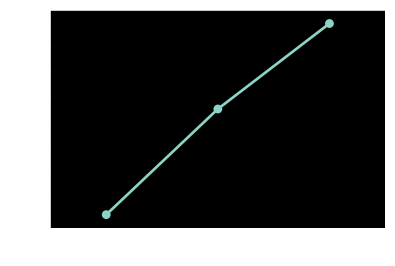

In [19]:
from sklearn.decomposition import PCA

pca_1 = PCA(1)
pca_2 = PCA(2)
pca_3 = PCA(3)

pca_1.fit(num_data)
pca_2.fit(num_data)
pca_3.fit(num_data)

cum_var = (np.cumsum(pca_3.explained_variance_ratio_))
n_comp = [i for i in range(1,4)]

ax = sns.pointplot(x=n_comp, y=cum_var)
ax.set(xlabel='# components', ylabel='cumulative explained variance')
plt.show()

In [25]:
data_1c = pca_1.transform(num_data)
data_2c = pca_2.transform(num_data)
data_3c = pca_3.transform(num_data)

The amount of explained variance is low with up to three principal component, thus I don't expect that the classes are gonna be well divisible by just applying PCA. Nonetheless, let's check the class distribution for the first two PC's:

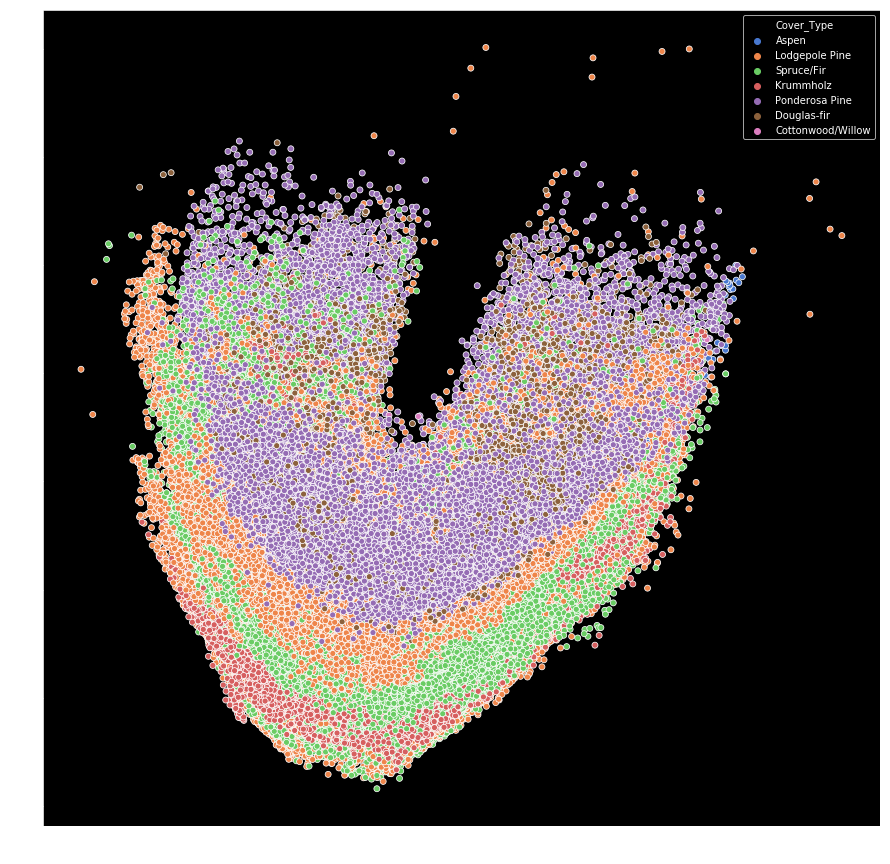

In [48]:
plt.figure(figsize=(15,15))

ax = sns.scatterplot(x=data_2c[:,0], 
                     y=data_2c[:,1], 
                     hue=data['Cover_Type'],
                     palette=sns.color_palette("muted", n_colors=7))

ax.set(xlabel='1 PC', ylabel='2 PC')
plt.show()

And now for the three first PC's:

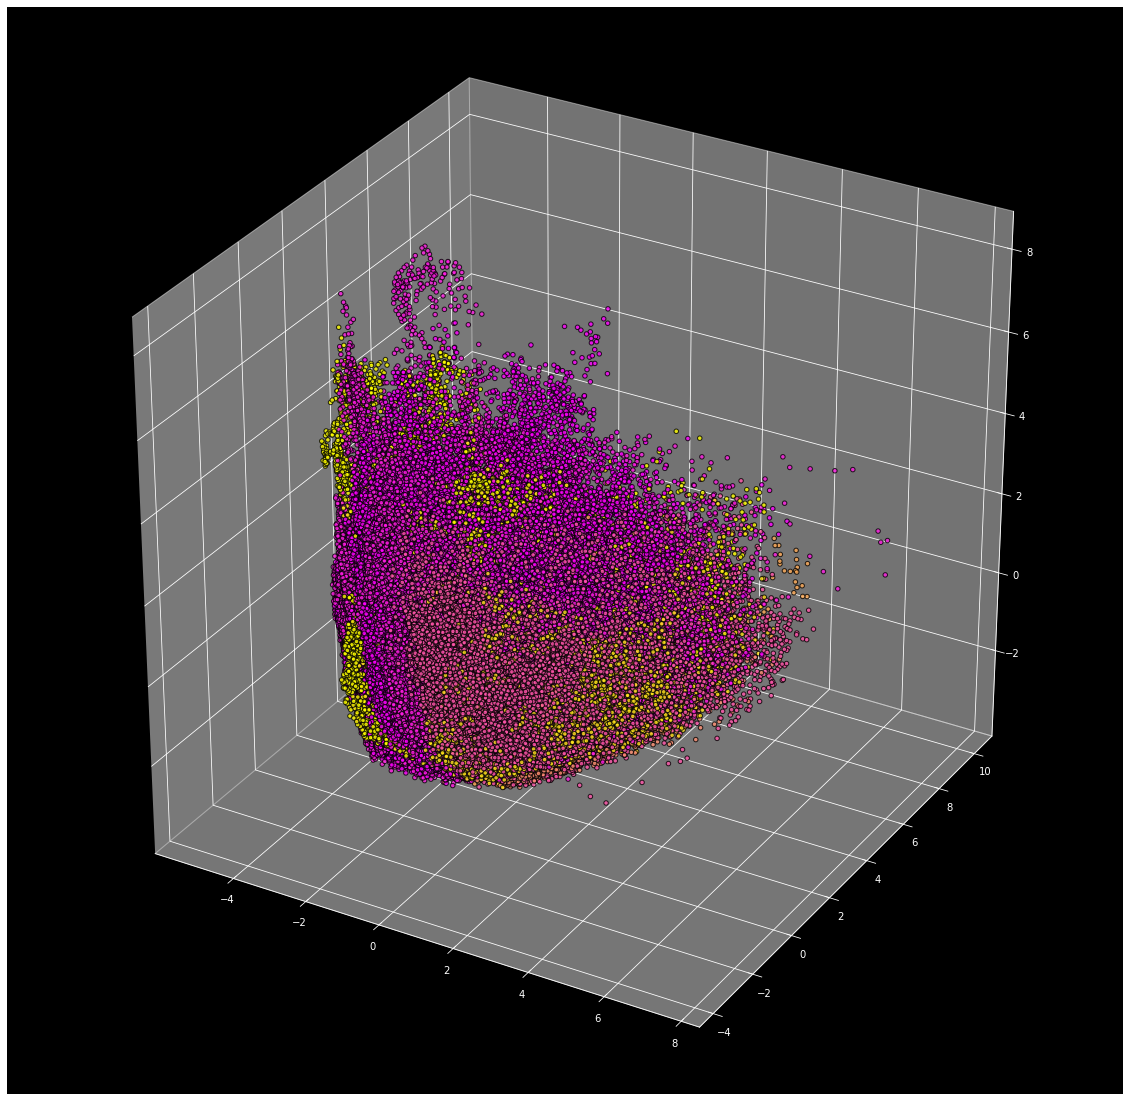

In [37]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_3c[:,0], data_3c[:,1], data_3c[:,2], c=data['Cover_Type'], 
            edgecolor='none', alpha=0.8,
            cmap=plt.get_cmap('spring', 7))
plt.show()

As expected, with the use of only the first three PC's there doesn't seem to be a hyperplane capable of separating the classes appropriately.